# **BIG MART SALES PREDICTION**

**IMPORTING LIBRARIES**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle

In [2]:
train_dataset = pd.read_csv('.\Train.csv')
test_dataset = pd.read_csv('.\Test.csv')

In [3]:
train_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [4]:
test_dataset

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [5]:
print('The training dataset has {} columns.'.format(train_dataset.shape[1]))
print('The training dataset has {} rows.'.format(train_dataset.shape[0]))

print('The test dataset has {} rows.'.format(test_dataset.shape[0]))
print('The test dataset has {} columns.'.format(test_dataset.shape[1]))

The training dataset has 12 columns.
The training dataset has 8523 rows.
The test dataset has 5681 rows.
The test dataset has 11 columns.


In [6]:
#in the test dataset 'Item_Outlet_Sales' is missing.
#we will create new column and fill 0 in it.
test_dataset['Item_Outlet_Sales']=0
merged_data=pd.concat([train_dataset,test_dataset],sort=False,axis=0,ignore_index=True)

print(train_dataset.shape,test_dataset.shape,merged_data.shape)

(8523, 12) (5681, 12) (14204, 12)


In [7]:
merged_data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1                Soft Drinks   48.2692            OUT018   
2                       Meat  141.6180            OUT049   
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
...                      ...       ...               ...   
14199            Snack Foods  141.3154            OUT046   
14200          Starchy Foods  169.1448            OUT018   
14201     Health and Hygiene  118.7440            OUT045   
14202                 Canned  214.6218            OUT017   
14203                 Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                           1999      Medium               Tier 1   
1                           2009      Medium               Tier 3   
2                           1999      Medium               Tier 1   
3                           1998         NaN               Tier 3   
4                           1987        High               Tier 3   
...                          ...         ...                  ...   
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002         NaN               Tier 2   
14202                       2007         NaN               Tier 2   
14203                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales  
0      Supermarket Type1          3735.1380  
1      Supermarket Type2           443.4228  
2      Supermarket Type1          2097.2700  
3          Grocery Store           732.3800  
4      Supermarket Type1           994.7052  
...                  ...                ...  
14199  Supermarket Type1             0.0000  
14200  Supermarket Type2             0.0000  
14201  Supermarket Type1             0.0000  
14202  Supermarket Type1             0.0000  
14203  Supermarket Type1             0.0000  

[14204 rows x 12 columns]

In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


'Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year' and 'Item_Outlet_Sales' are numerical features


'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type' and "Outlet_Sales' are strings/objects.


In [9]:
#statistical information about dataset
merged_data.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count       14204.000000  
mean         1308.865489  
std          1699.791423  
min             0.000000  
25%             0.000000  
50%           559.272000  
75%          2163.184200  
max         13086.964800

In [10]:
#categorical features information
merged_data.describe(include="O")

Item_Identifier Item_Fat_Content              Item_Type  \
count            14204            14204                  14204   
unique            1559                5                     16   
top              FDU15          Low Fat  Fruits and Vegetables   
freq                10             8485                   2013   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count              14204       10188                14204              14204  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                1559        4655                 5583               9294

In [11]:
#finding categorical feature from dataset
categorical_features=merged_data.select_dtypes(include=['O'])
categorical_features.head()

Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet_Type  
0      Medium               Tier 1  Supermarket Type1  
1      Medium               Tier 3  Supermarket Type2  
2      Medium               Tier 1  Supermarket Type1  
3         NaN               Tier 3      Grocery Store  
4        High               Tier 3  Supermarket Type1

In [12]:
#finding numerical feature from dataset
numerical_features=merged_data.select_dtypes(exclude=['O'])
numerical_features.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [13]:
#unique label in each categorical features
for feature in categorical_features:
     print('The unique label in {}:{}'.format(feature,categorical_features[feature].unique()))

The unique label in Item_Identifier:['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
The unique label in Item_Fat_Content:['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
The unique label in Item_Type:['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
The unique label in Outlet_Identifier:['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
The unique label in Outlet_Size:['Medium' nan 'High' 'Small']
The unique label in Outlet_Location_Type:['Tier 1' 'Tier 3' 'Tier 2']
The unique label in Outlet_Type:['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [14]:
#replacing 'lf' to "Low Fat", "low fat" to "Low Fat" and "reg" to "Regular"
merged_data['Item_Fat_Content']=merged_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
merged_data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

# **Visualization**

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

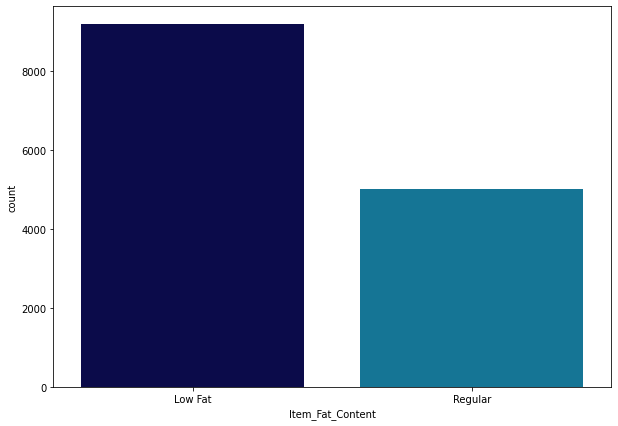

In [15]:
plt.figure(figsize=(10,7))
sns.countplot('Item_Fat_Content',data=merged_data,palette='ocean')

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

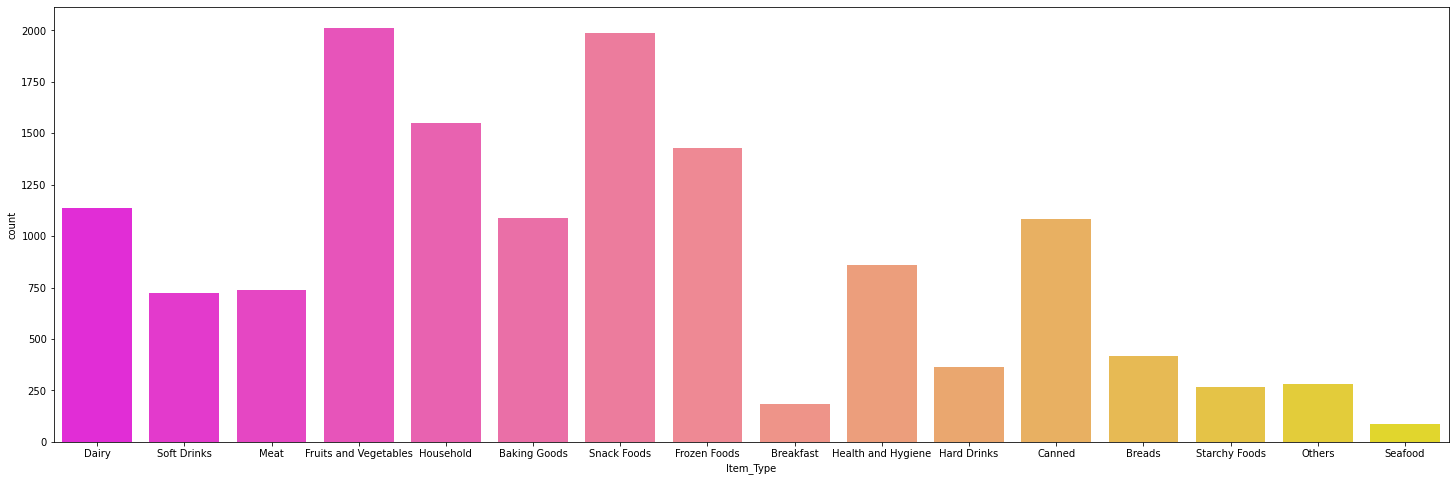

In [16]:
plt.figure(figsize=(25,8))
sns.countplot('Item_Type',data=merged_data,palette='spring')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

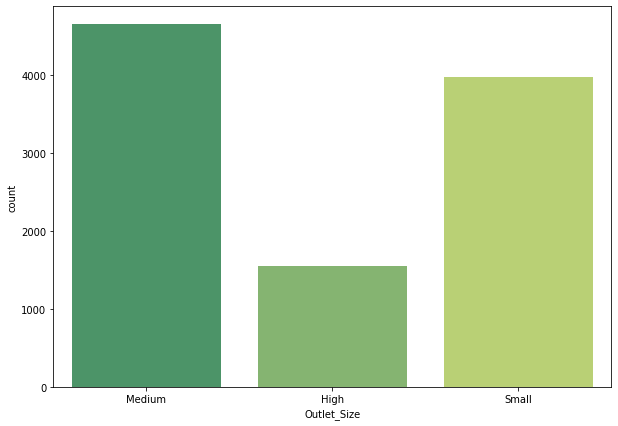

In [17]:
plt.figure(figsize=(10,7))
sns.countplot('Outlet_Size',data=merged_data,palette='summer')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

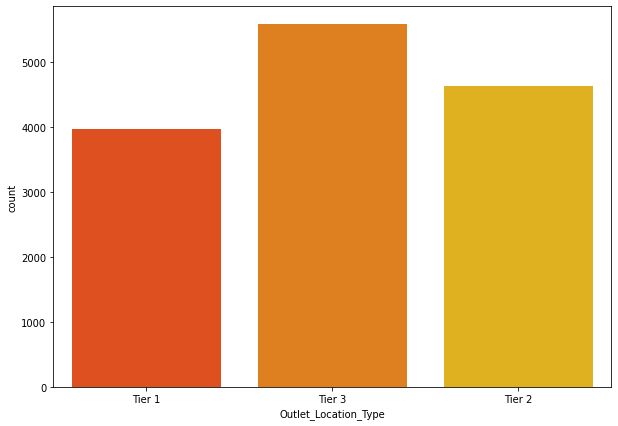

In [18]:
plt.figure(figsize=(10,7))
sns.countplot('Outlet_Location_Type',data=merged_data,palette='autumn')

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

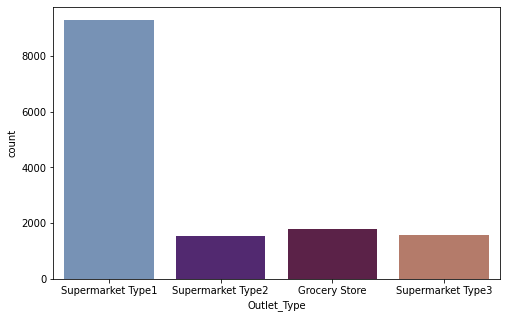

In [19]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=merged_data,palette='twilight')

**Numerical feature analysis**

In [20]:
fig=px.histogram(data_frame=merged_data,x='Item_Weight',y='Item_Outlet_Sales',width=800,height=500,title="Item_Weight")
fig.show()

In [21]:
fig=px.histogram(data_frame=merged_data,x='Item_Visibility',y='Item_Outlet_Sales',width=800,height=500,title="Sales by Item Visibility")
fig.show()

In [22]:
fig=px.histogram(data_frame=merged_data,x='Item_MRP',y='Item_Outlet_Sales',width=800,height=500,title="Item MRP")
fig.show()

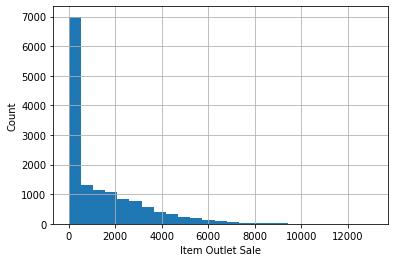

In [23]:
merged_data['Item_Outlet_Sales'].hist(bins=25)
plt.xlabel("Item Outlet Sale")
plt.ylabel("Count")
plt.show()

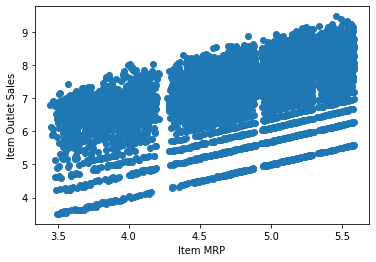

In [24]:
#using logarithmic transformation
data=merged_data.copy()
data['Item_MRP']=np.log(data['Item_MRP'])
data['Item_Outlet_Sales']=np.log(data['Item_Outlet_Sales'])
plt.scatter(data["Item_MRP"],data["Item_Outlet_Sales"])
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.show()

**Categorical feature analysis**

In [25]:
#Visualizing the "Item_Outlet_Sale" based on "Item_Fat_Content"
fig=px.pie(merged_data,names='Item_Fat_Content',values='Item_Outlet_Sales',width=800,height=500,title='Outlet Sales by Item Fat Content')
fig.show()

In [26]:
#Visualizing the "Item_Outlet_Sale" based on "Item_Type"
fig=px.pie(merged_data,names='Item_Type',values='Item_Outlet_Sales',title='Sales by Item Type')
fig.show()

In [27]:
#Visualizing the "Item_Outlet_Sale" based on "Outlet Identifier"
fig=px.pie(merged_data,names='Outlet_Identifier',values='Item_Outlet_Sales',width=800,height=500,title='Sales by Outlet Identifier')
fig.show()

In [28]:
#Visualizing the "Item_Outlet_Sale" based on "Outlet Size"
fig=px.pie(merged_data,names='Outlet_Size',values='Item_Outlet_Sales',width=800,height=500,title='Sales by Outlet_Size')
fig.show()

In [29]:
#Visualizing the "Item_Outlet_Sale" based on "Outlet_Location_Type"
fig=px.pie(data_frame=merged_data,names='Outlet_Location_Type',values='Item_Outlet_Sales',width=800,height=500,title='Sales by Outlet Location Type')
fig.show()

In [30]:
#Visualizing the "Item_Outlet_Sale" based on "Outlet_Type"
fig=px.pie(data_frame=merged_data,names='Outlet_Type',values='Item_Outlet_Sales',width=800,height=500,title='Sales by Outlet Type')
fig.show()

**Multivariate analysis**

In [31]:
fig=px.box(merged_data,x="Item_Type",y="Item_Outlet_Sales",color="Item_Fat_Content",title="Sales by Item fat content and item type",width=800,height=400)
fig.show()

In [32]:
fig=px.histogram(merged_data,x="Item_Type",y="Item_Outlet_Sales",color="Outlet_Location_Type",title="Sales by Outlet Location Type and item type",width=800,height=400)
fig.show()

In [33]:
fig=px.box(merged_data,x="Outlet_Identifier",y="Item_Weight",width=800,height=500,title="Item weight Vs Outlet Identifier")
fig.show()

In [34]:
#feature to describe the no of years the outlet has been in existence
merged_data['Current_Year']=(2022-merged_data.Outlet_Establishment_Year)
merged_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Current_Year  
0  Supermarket Type1          3735.1380            23  
1  Supermarket Type2           443.4228            13  
2  Supermarket Type1          2097.2700            23  
3      Grocery Store           732.3800            24  
4  Supermarket Type1           994.7052            35

In [36]:
px.box(data_frame=merged_data,x='Current_Year',y='Item_Outlet_Sales',width=800,height=500,title='Current Year Vs Item Outlet Sales')

In [37]:
#checking outliers
fig=px.box(merged_data,y="Item_MRP",width=800,height=500)
fig.show()

In [38]:
#checking outliers for Item_weight
fig=px.box(merged_data,y="Item_Weight",width=800,height=500)
fig.show()

**DATA CLEANING**
